# Description

- this notebooks uses model saved by `./Tuberculosis Analysis.ipynb` and predicts class for a given image

In [1]:
# Place all imports here
import pickle
import cv2

from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
# a function which takes path and returns the resized array
def image_to_array(path):
    dim = (128, 128)
    current_image = cv2.imread(path)
    resized_image = cv2.resize(current_image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

## Load and Predict Model

In [3]:
# load the model from disk
filename = './models/random_forest.pickle'
loaded_model = pickle.load(open(filename, 'rb'))

### Image to class prediction

In [4]:
# Takes a local image path and return class
def image_to_class(image_path):
    sample_image = image_to_array(image_path)
    sample_image_reshaped = sample_image.reshape(sample_image.shape[0] * sample_image.shape[1] *  sample_image.shape[2])
    
    class_predicted = loaded_model.predict([sample_image_reshaped])[0]
    
    if class_predicted:
        return 'Suffering From Tuberculosis'
    else:
        return 'Normal'

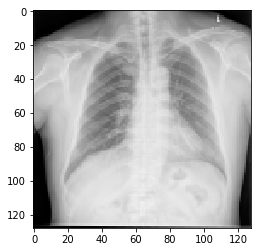

In [5]:
sample_image_path = '../data/ChinaSet_AllFiles/CXR_png/CHNCXR_0001_0.png'
plt.imshow(image_to_array(sample_image_path), interpolation='nearest')

In [6]:
image_to_class(sample_image_path)

'Normal'

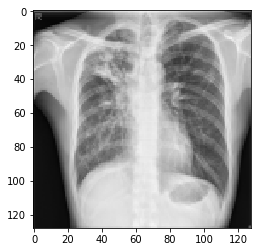

In [7]:
sample_image_path = '../data/ChinaSet_AllFiles/CXR_png/CHNCXR_0408_1.png'
plt.imshow(image_to_array(sample_image_path), interpolation='nearest')

In [8]:
image_to_class(sample_image_path)

'Suffering From Tuberculosis'